In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Section 1. Load and Visualiase the Data
- Download
- Load
- Visualise
- Normalization

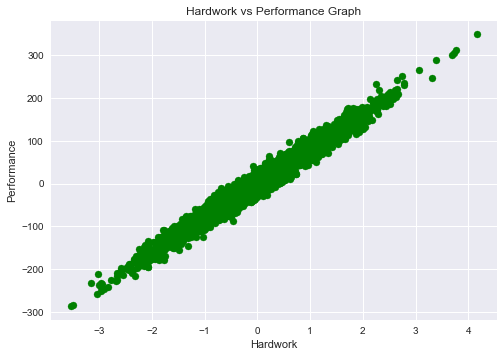

In [7]:
# Load
X = pd.read_csv("Linear_X_Train.csv")
Y = pd.read_csv("Linear_Y_Train.csv")

# Convert X,Y to numpy arrays
X = X.values
Y = Y.values

# Normalization
u = X.mean()
std = X.std()
X = (X-u)/std
# Visualise
plt.style.use("seaborn")
plt.scatter(X,Y,color = "green")
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [8]:
X.shape,Y.shape

((3750, 1), (3750, 1))

### Section 2. Linear Regression

In [37]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    t0,t1 = 0,0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        t0 += (y_-y)
        t1 += (y_-y)*X[i]
    return t0/m , t1/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_-Y[i])**2
    return total_error/m
        
def gradientdescent(X,Y,maxsteps = 100,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(maxsteps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list

In [38]:
theta,error_list,theta_list = gradientdescent(X,Y)

In [39]:
theta

array([ 0.6838508 , 79.90361453])

In [40]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

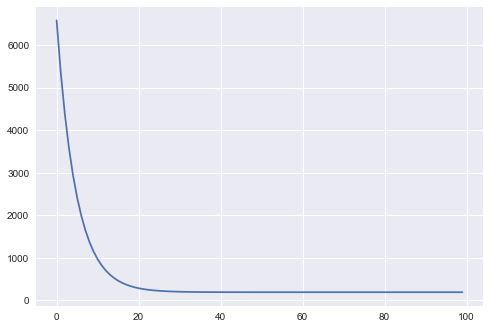

In [41]:
plt.plot(error_list)

### Section 3. Predictions and Best Line

In [42]:
Y_ = hypothesis(X,theta)

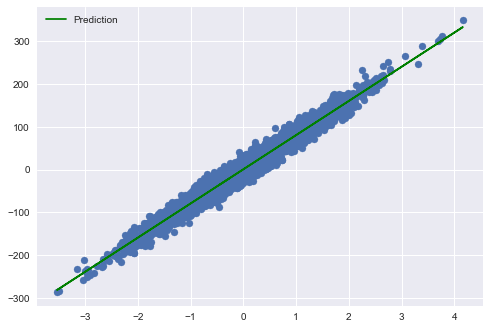

In [43]:
plt.scatter(X,Y)
plt.plot(X,Y_,color = "green",label = "Prediction")
plt.legend()
plt.show()

In [44]:
# Load the Test Data
x_test = pd.read_csv("Linear_X_Test.csv").values
y_test = hypothesis(x_test,theta)

y_test.shape

(1250, 1)

In [45]:
df = pd.DataFrame(y_test,columns = ["y"])

In [46]:
df.to_csv("y_prediction.csv",index = False)

### Section 4. Computing Score
Score : R2(R-squared) or Coefficient of Determination

In [47]:
def r2_score(Y,Y_):
    # Instead of loop, np.sum is recommended because it is fast
    num = np.sum((Y_-Y)**2)
    denom = np.sum((Y_-Y.mean())**2)
    score = (1-num/denom)
    return score*100

In [48]:
r2_score(Y,Y_)

97.00911640073193

### Section 5. Visualizing Loss Function , Gradient Descent , Theta Updates

In [49]:
from mpl_toolkits.mplot3d import Axes3D

In [50]:
theta

array([ 0.6838508 , 79.90361453])

In [57]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0]

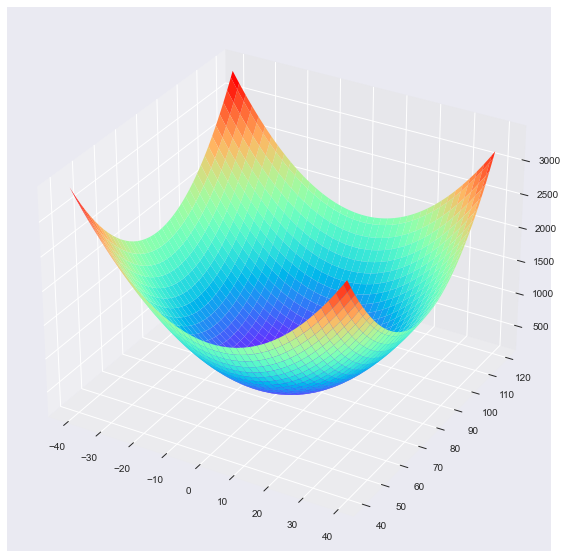

In [58]:
fig = plt.figure(figsize = (10,10))
axes = plt.axes(projection = '3d')
axes.plot_surface(T0,T1,J,cmap = 'rainbow')
plt.show()

### Plot the changes in the values of theta

In [59]:
theta_list = np.array(theta_list)

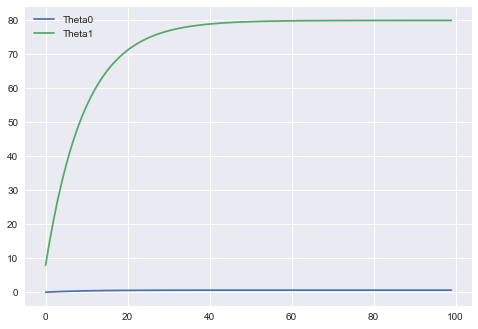

In [60]:
plt.plot(theta_list[:,0],label = "Theta0")
plt.plot(theta_list[:,1],label = "Theta1")
plt.legend()
plt.show()

### Trajectory traced by theta updates in the loss function

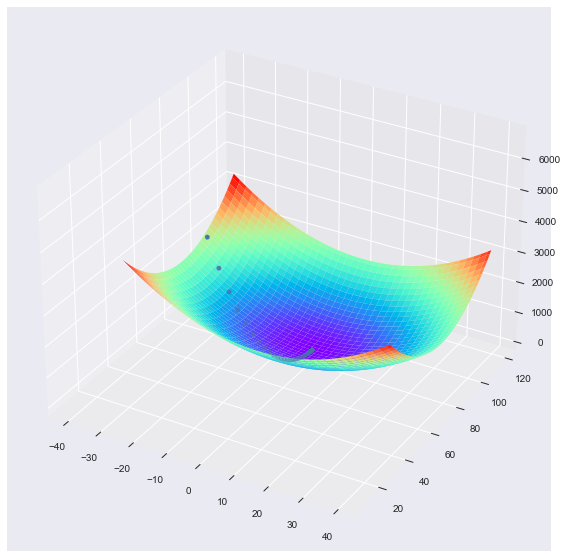

In [61]:
fig = plt.figure(figsize = (10,10))
axes = plt.axes(projection = '3d')
axes.plot_surface(T0,T1,J,cmap = 'rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

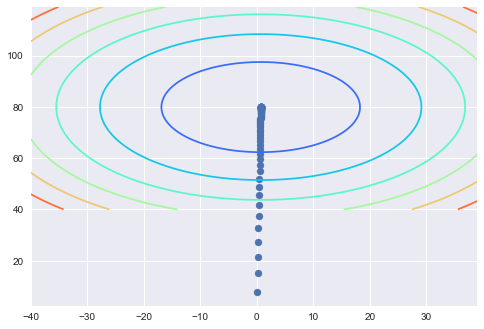

In [62]:
# 2D contour plot
plt.contour(T0,T1,J,cmap = "rainbow")
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

In [63]:
np.save("ThetaList.npy",theta_list)